<a href="https://colab.research.google.com/github/KahChoo99/ETL-Shopee/blob/main/ETL_Shopee_Watches.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Group 6 Members:**<br>

> a. Teo Jie Xi (A176716) <br>
    b. Tang Jia Hui (A176297) <br>
    c. Wong Wai Jian (A175985) <br>
    d. Ooi Kah Choo (A176225) <br>



#**Step 1: Import Libraries**

In [ ]:
import requests
import re
import string

!pip install malaya
import malaya

!pip install fasttext
import fasttext

import numpy as np
import pandas as pd

!pip install chart-studio

     |████████████████████████████████| 2.2 MB 9.0 MB/s 
     |████████████████████████████████| 64 kB 2.8 MB/s 
     |████████████████████████████████| 288 kB 65.8 MB/s 
     |████████████████████████████████| 235 kB 45.3 MB/s 
     |████████████████████████████████| 1.2 MB 58.5 MB/s 
     |████████████████████████████████| 1.6 MB 42.7 MB/s 
     |████████████████████████████████| 41 kB 189 kB/s 
  Created wheel for ftfy: filename=ftfy-6.0.3-py3-none-any.whl size=41933 sha256=5d0930db226a1bae1dea282206f9dcc4108fbcf52cc472cb6417611c815d8fc3
  Stored in directory: /root/.cache/pip/wheels/19/f5/38/273eb3b5e76dfd850619312f693716ac4518b498f5ffb6f56d
  Created wheel for memoization: filename=memoization-0.4.0-py3-none-any.whl size=50466 sha256=113c1c3caa69598867042a5fecfbb775eb07f2a639465a717d9f9fb35a932e25
  Stored in directory: /root/.cache/pip/wheels/38/f7/65/161985e7311dd484a23b3a5c9149995dbf11db6cede602e7ef
Successfully built ftfy memoization
  Attempting uninstall: networkx
    Found 

/usr/local/lib/python3.7/dist-packages/malaya_boilerplate/frozen_graph.py:35: UserWarning:

Cannot import beam_search_ops from Tensorflow Addons, `deep_model` for stemmer will not available to use, make sure Tensorflow Addons version >= 0.12.0



     |████████████████████████████████| 68 kB 4.3 MB/s 
  Using cached pybind11-2.9.0-py2.py3-none-any.whl (210 kB)
  Created wheel for fasttext: filename=fasttext-0.9.2-cp37-cp37m-linux_x86_64.whl size=3125963 sha256=0423269190c0004d706a539c7ead8c076d4199af85e30444bab28524465db5ee
  Stored in directory: /root/.cache/pip/wheels/4e/ca/bf/b020d2be95f7641801a6597a29c8f4f19e38f9c02a345bab9b
Successfully built fasttext


#**Step 2: Extraction & Visualization**

##**Step 2.1: Define and Call Scraping Function**

In [ ]:
# define list
list_name = []
list_total_sold = []
list_total_favorite = []
list_brand = []
list_min_price = []
list_max_price = []
list_rating = []
list_shipping_fee = []
list_shop_location = []
list_discount = []

# function
def main(watch, items_number=200):
    url = "https://shopee.com.my/api/v4/search/search_items"

    params = {
        "by": "relevancy",
        "keyword": watch,
        "limit": 100,  # default value at start
        "newest": 0,   # default value at start
        "order": "desc",
        "page_type": "search",
        "scenario": "PAGE_GLOBAL_SEARCH",
        "version": "2"
    }
    
    for offset in range(0, items_number, 100):
        params["newest"] = offset
        limit = items_number - offset
        if limit < 100:
            params["limit"] = limit
        r = requests.get(url, params=params)
        data = r.json()    
        print('Total data collected:', len(data['items']), '\n')
        
        x = 0
        for number, item in enumerate(data['items']):

            basic = item['item_basic']

            # # show the type of key
            # print(x)

            # print('keys:', basic.keys())
            # for key, value in basic.items():
            #    print(f"{key}: {value}")
          
            # x += 1
            # print("")
              
            # product name
            list_name.append(basic['name'])

            # total_sold
            list_total_sold.append(basic['historical_sold'])

            # total_favorite
            list_total_favorite.append(basic['liked_count'])

            # brand_name
            brand = basic.get('brand')
            if brand is None:
                list_brand.append('NaN')
            else:
                list_brand.append(brand)

            # min_price
            list_min_price.append(basic.get('price_min'))

            # max_price
            list_max_price.append(basic.get('price_max'))

            # rating
            list_rating.append(basic['item_rating']['rating_star'])

            # shipping_fee
            list_shipping_fee.append(basic['show_free_shipping'])

            # shop_location
            list_shop_location.append(basic['shop_location'])

            # discount
            discount=basic.get('discount')
            if discount is None:
              list_discount.append('0%')
            else:
              list_discount.append(discount)


# execute function
main("watch")

Total data collected: 100 

Total data collected: 100 



Attributes: Product Name, Total Sold, Total Favourite, Brand, Minimum Price, Maximum Price, Average Rating, Shipping Fee, Shop Location. Discount

In [ ]:
data_df = pd.DataFrame({'Product Name' : list_name ,
                        'Total of Sold' : list_total_sold, 
                        'Total of Favourite' : list_total_favorite, 
                        'Brand' : list_brand,
                        'Min Price (RM)' : list_min_price,
                        'Max Price (RM)' : list_max_price,
                        'Average Rating' : list_rating,
                        'Shipping Fee' : list_shipping_fee,
                        'Shop Location' : list_shop_location,
                        'Discount (%)' : list_discount})

In [ ]:
data_df.head(5)

,Product Name,Total of Sold,Total of Favourite,Brand,Min Price (RM),Max Price (RM),Average Rating,Shipping Fee,Shop Location,Discount (%)
0,[Malaysia 3 Year Warranty] CASIO GSHOCK King o...,13996,5441,No Brand,490000,1830000,4.757587,False,Selangor,91%
1,SANDA Waterproof Men Fashion Luminous Watch Me...,54,55,NaN,2990000,2990000,4.812500,False,Mainland China,75%
2,READY STOCK🔥GRIMO Snova Digital Watch Women Ma...,25488,6927,No Brand,790000,790000,4.881279,True,Selangor,84%
3,Ready stock F10 🔥Smart Watch Full Touch Screen...,20537,21744,OEM,2990000,5999000,4.829460,False,Selangor,60%
4,【Ready Stock】jam tangan perempuan korean versi...,2357,2014,NaN,517000,747000,4.874112,False,Mainland China,78%


In [ ]:
data_df.dtypes

Product Name           object
Total of Sold           int64
Total of Favourite      int64
Brand                  object
Min Price (RM)          int64
Max Price (RM)          int64
Average Rating        float64
Shipping Fee             bool
Shop Location          object
Discount (%)           object
dtype: object

##**Step 2.2: Data Cleaning & Visualization**

###**Product Name**

In [ ]:
# change all words in the dataframe to lowercase
# Reason: To ease the latter data cleaning process by avoiding situations such as 2 same words are identified as different
#         words due to their difference in letter case 
data_df['Product Name'] = data_df['Product Name'].map(lambda x: x.lower())

# replace html ampersand(&amp) to the word 'and' that exists in the dataframe
# Reason: To avoid different representation of word with the same meaning (&amp; is the same as the word 'and')
data_df['Product Name'] = data_df['Product Name'].map(lambda x: re.sub('&amp;', 'and', x))

# remove apostrophe s that exists in the dataframe
# Reason: Avoid possible redundancy (example: women's and women are semantically the same in this case study)
#         Besides, symbols are not important for analysis.
data_df['Product Name'] = data_df['Product Name'].map(lambda x: re.sub("('s|【|】|（|《|》)", ' ', x))

# remove punctuation
data_df['Product Name'] = data_df['Product Name'].map(lambda x: ''.join(character for character in x if character not in list(string.punctuation)))

# Reason: To assist the smooth removal of certain words without worrying that extra spaces will incur a difference between the same word.
# Example: 'jam tangan' and 'jam  tangan'
data_df['Product Name'] = data_df['Product Name'].map(lambda x: ' '.join(x.split()))

# remove non-alphanumeric (etc. emoji)
data_df['Product Name'] = data_df['Product Name'].str.replace(r'[^a-zA-Z ]\s?',r'',regex=True)

# Remove words that are detected to belong to words of the Malay language.
fast_text = malaya.language_detection.fasttext()
data_df['Product Name'] = data_df['Product Name'].map(lambda x: ' '.join(word for word in x.split() if (fast_text.predict([word])[0] != 'malay' or (word.isalnum() and not word.isalpha() and not word.isdigit()) ) ))


 78%|███████▊  | 23.0/29.6 [00:00<00:00, 28.4MB/s]/usr/local/lib/python3.7/dist-packages/tqdm/std.py:536: TqdmWarning: clamping frac to range [0, 1]
  colour=colour)
101%|██████████| 30.0/29.6 [00:00<00:00, 30.2MB/s]


In [ ]:
# Define function refine_and_remove_repeated_info to refine the process of removing malay language words
def refine_and_remove_repeated_info(sentence):
    sentence = re.sub('(jam tangan|jam)', '', sentence)
    sentence = re.sub('(perempuan|wanita|female|ladies)', 'women', sentence)
    sentence = re.sub('(lelaki|male)', 'men', sentence)
    sentence = re.sub('(budak|kanak|children|kids)', 'kid', sentence)
    sentence = re.sub('pasangan', 'couple', sentence)
    sentence = re.sub('rasmi', 'official', sentence)
    sentence = re.sub('asal', 'original', sentence)
    sentence = re.sub('murah', 'cheap', sentence)

    s = ''
    final_lst = []
    for w in sentence.split():
        if w not in final_lst:
            final_lst.append(w)
            s += w +" "
    return s.strip()

In [ ]:
data_df['Product Name'] = data_df['Product Name'].apply(refine_and_remove_repeated_info)

In [ ]:
data_df.head(5)

,Product Name,Total of Sold,Total of Favourite,Brand,Min Price (RM),Max Price (RM),Average Rating,Shipping Fee,Shop Location,Discount (%)
0,year warranty casio gshock king of bb dark gxb...,13996,5441,No Brand,490000,1830000,4.757587,False,Selangor,91%
1,sanda waterproof men fashion watch luxury casu...,54,55,NaN,2990000,2990000,4.812500,False,Mainland China,75%
2,ready stockgrimo snova watch women magnet watc...,25488,6927,No Brand,790000,790000,4.881279,True,Selangor,84%
3,ready stock fsmart watch full touch screen hea...,20537,21744,OEM,2990000,5999000,4.829460,False,Selangor,60%
4,ready stock korean version of women retro watc...,2357,2014,NaN,517000,747000,4.874112,False,Mainland China,78%


###**Brand**

Text(0, 0.5, 'Frequency')

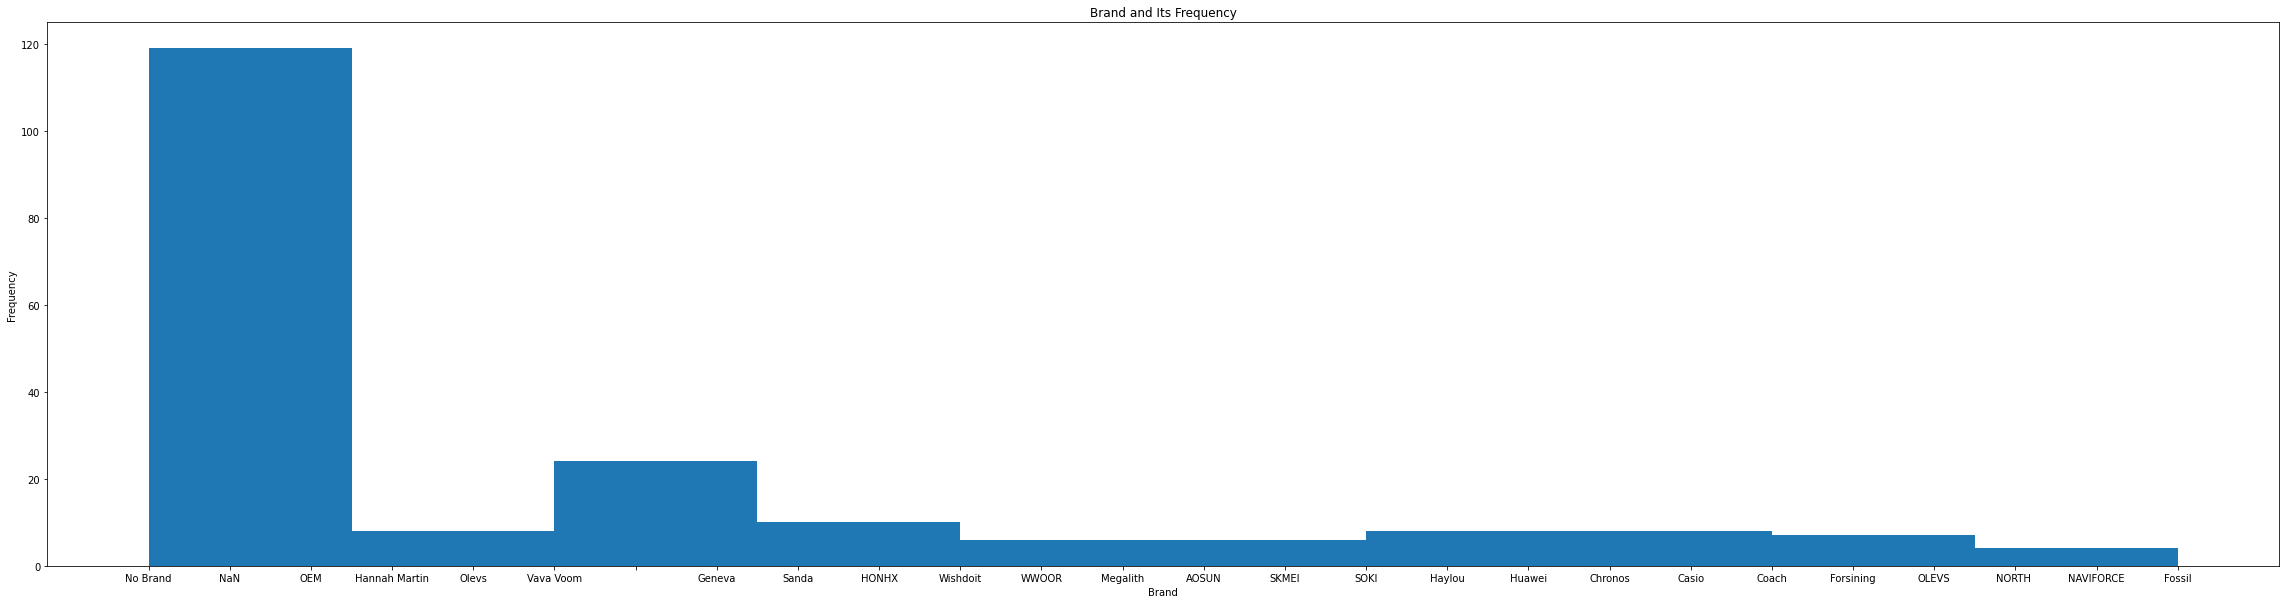

In [ ]:
#data visualisation for brand before cleaning
#histogram
import matplotlib.pyplot as plt
fig, axs = plt.subplots(figsize =(40,10))
axs.hist(data_df['Brand'])

# Set title
axs.set_title("Brand and Its Frequency")

# adding labels
axs.set_xlabel('Brand')
axs.set_ylabel('Frequency')

In [ ]:
data_df['Brand'].unique()

array(['No Brand', 'NaN', 'OEM', 'Hannah Martin', 'Olevs', 'Vava Voom',
       '', 'Geneva', 'Sanda', 'HONHX', 'Wishdoit', 'WWOOR', 'Megalith',
       'AOSUN', 'SKMEI', 'SOKI', 'Haylou', 'Huawei', 'Chronos', 'Casio',
       'Coach', 'Forsining', 'OLEVS', 'NORTH ', 'NAVIFORCE', 'Fossil'],
      dtype=object)

In [ ]:
data_df['Brand'] = data_df['Brand'].replace({'NaN':'No Brand', '0': 'No Brand', '': 'No Brand'})
data_df['Brand'] = data_df['Brand'].map(lambda x: x.lower())

In [ ]:
data_df.head(5)

,Product Name,Total of Sold,Total of Favourite,Brand,Min Price (RM),Max Price (RM),Average Rating,Shipping Fee,Shop Location,Discount (%)
0,year warranty casio gshock king of bb dark gxb...,13996,5441,no brand,490000,1830000,4.757587,False,Selangor,91%
1,sanda waterproof men fashion watch luxury casu...,54,55,no brand,2990000,2990000,4.812500,False,Mainland China,75%
2,ready stockgrimo snova watch women magnet watc...,25488,6927,no brand,790000,790000,4.881279,True,Selangor,84%
3,ready stock fsmart watch full touch screen hea...,20537,21744,oem,2990000,5999000,4.829460,False,Selangor,60%
4,ready stock korean version of women retro watc...,2357,2014,no brand,517000,747000,4.874112,False,Mainland China,78%


Data Visualisation for Brand after removing outliers

Text(0, 0.5, 'Frequency')

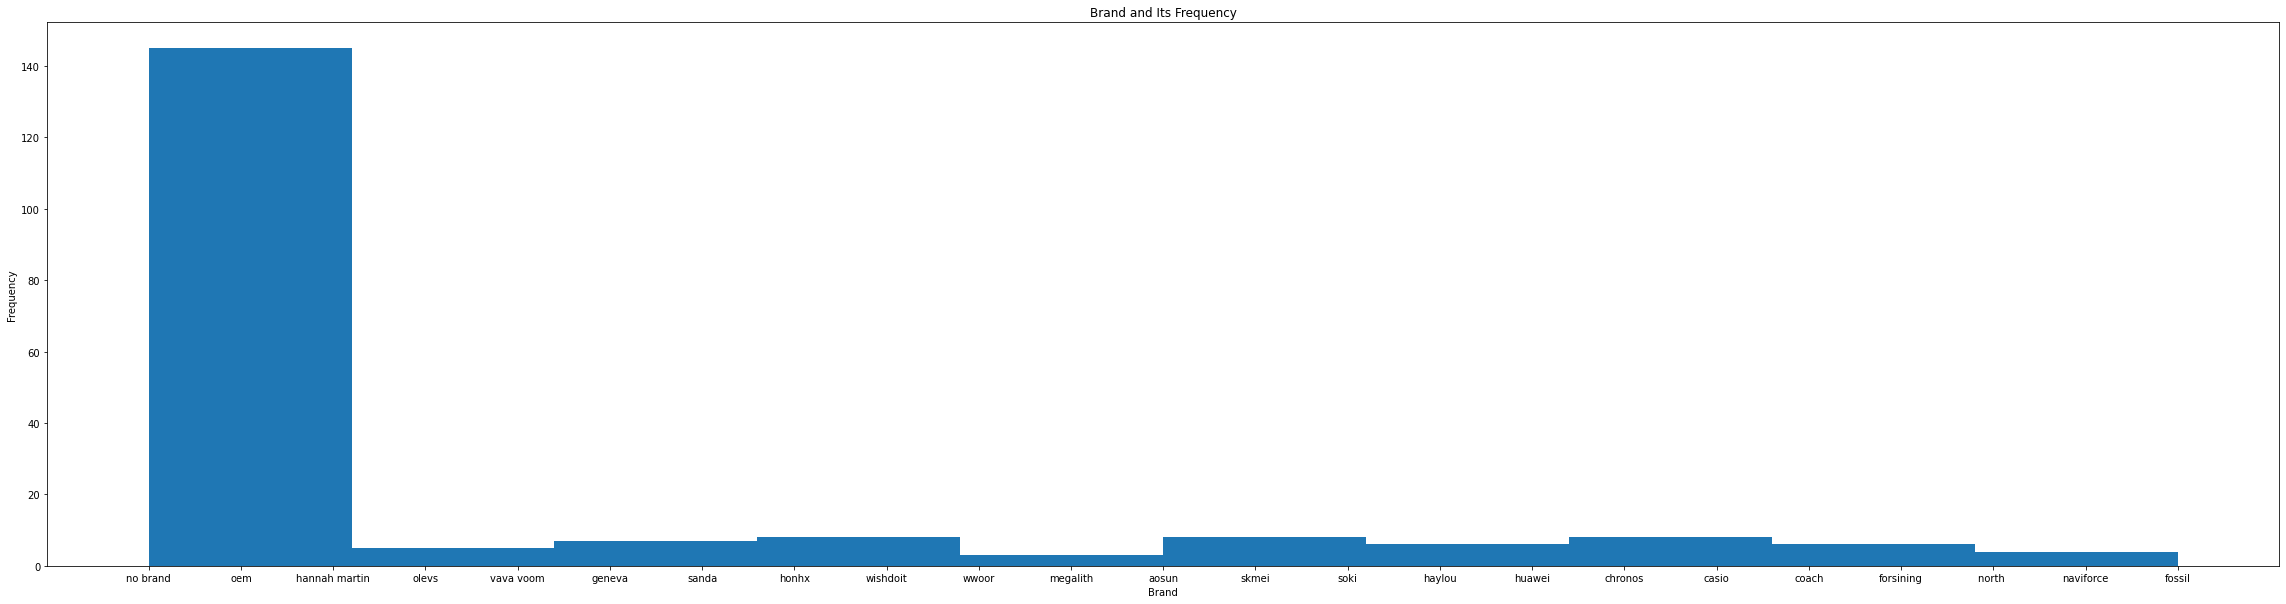

In [ ]:
#data visualisation for brand after cleaning
#histogram
import matplotlib.pyplot as plt
fig, axs = plt.subplots(figsize =(40,10))
axs.hist(data_df['Brand'])

# Set title
axs.set_title("Brand and Its Frequency")

# adding labels
axs.set_xlabel('Brand')
axs.set_ylabel('Frequency')

###**Shop Location**

In [ ]:
data_df['Shop Location'].unique()

array(['Selangor', 'Mainland China', 'Kuala Lumpur', 'Penang', 'Johor',
       'Kelantan', 'Kedah'], dtype=object)

###**Price, Discount, Average Rating**

In [ ]:
data_df.describe()

,Total of Sold,Total of Favourite,Min Price (RM),Max Price (RM),Average Rating
count,200.000000,200.000000,2.000000e+02,2.000000e+02,200.000000
mean,3737.965000,1780.295000,6.346575e+06,7.715645e+06,4.771384
std,9248.078367,3135.301506,1.438004e+07,1.821230e+07,0.688251
min,0.000000,0.000000,5.900000e+04,5.900000e+04,0.000000
25%,318.000000,272.750000,9.000000e+05,1.245250e+06,4.815406
50%,883.500000,638.000000,2.980000e+06,3.294000e+06,4.882965
75%,2424.000000,1983.250000,5.770000e+06,6.212250e+06,4.929221
max,81270.000000,21744.000000,1.199000e+08,1.299000e+08,5.000000


In [ ]:
data_df["Min Price (RM)"] = data_df['Min Price (RM)']/100000
data_df["Max Price (RM)"] = data_df['Max Price (RM)']/100000
data_df["Discount (%)"] = data_df['Discount (%)'].replace({'%': ''}, regex=True).map(pd.eval).astype(int)
data_df['Average Rating'] = data_df['Average Rating'].round(2)

In [ ]:
data_df.head(5)

,Product Name,Total of Sold,Total of Favourite,Brand,Min Price (RM),Max Price (RM),Average Rating,Shipping Fee,Shop Location,Discount (%)
0,year warranty casio gshock king of bb dark gxb...,13996,5441,no brand,4.90,18.30,4.76,False,Selangor,91
1,sanda waterproof men fashion watch luxury casu...,54,55,no brand,29.90,29.90,4.81,False,Mainland China,75
2,ready stockgrimo snova watch women magnet watc...,25488,6927,no brand,7.90,7.90,4.88,True,Selangor,84
3,ready stock fsmart watch full touch screen hea...,20537,21744,oem,29.90,59.99,4.83,False,Selangor,60
4,ready stock korean version of women retro watc...,2357,2014,no brand,5.17,7.47,4.87,False,Mainland China,78


Data Visualisation for Average Rating, Min and Max Price before and after removing outliers

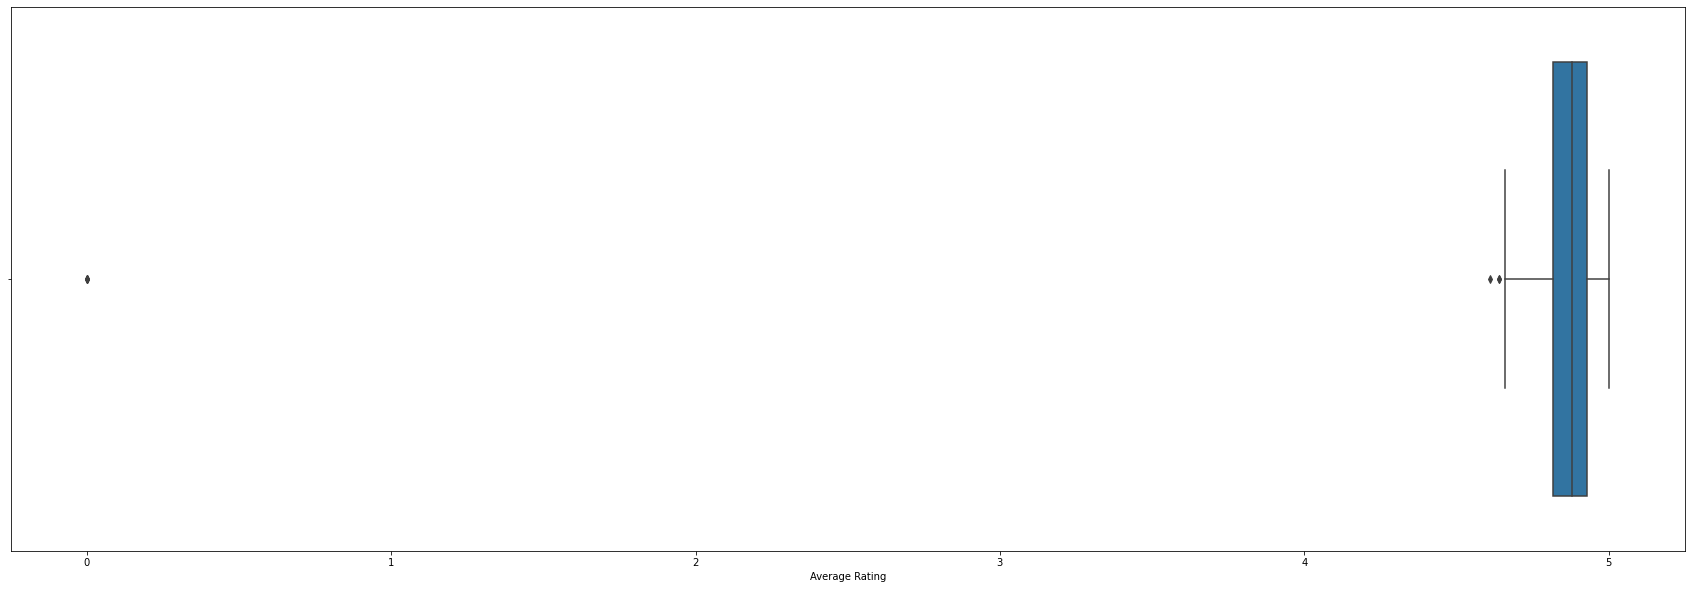

In [ ]:
#data visualization for average rating before remove outliers
rating = data_df['Average Rating']

#boxplot
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(30,10))
sns.boxplot(x=rating) #boxplot using seaborn

In [ ]:
#function to calculate boxplot
def find_boundaries(df, col):
  Q1=df[col].quantile(0.25)
  Q3=df[col].quantile(0.75)
  IQR=Q3-Q1
  lower_boundary=Q1- 1.5*IQR
  upper_boundary=Q3+ 1.5*IQR

  return lower_boundary, upper_boundary

In [ ]:
lower_bound, upper_bound = find_boundaries(data_df,'Average Rating')
print('lower boundary: ',lower_bound)
print('upper boundary: ', upper_bound)

data_df['Average Rating']=np.where(data_df['Average Rating']>upper_bound, upper_bound,
                          np.where(data_df['Average Rating']<lower_bound, lower_bound, data_df['Average Rating']))

lower boundary:  4.64875
upper boundary:  5.098749999999999


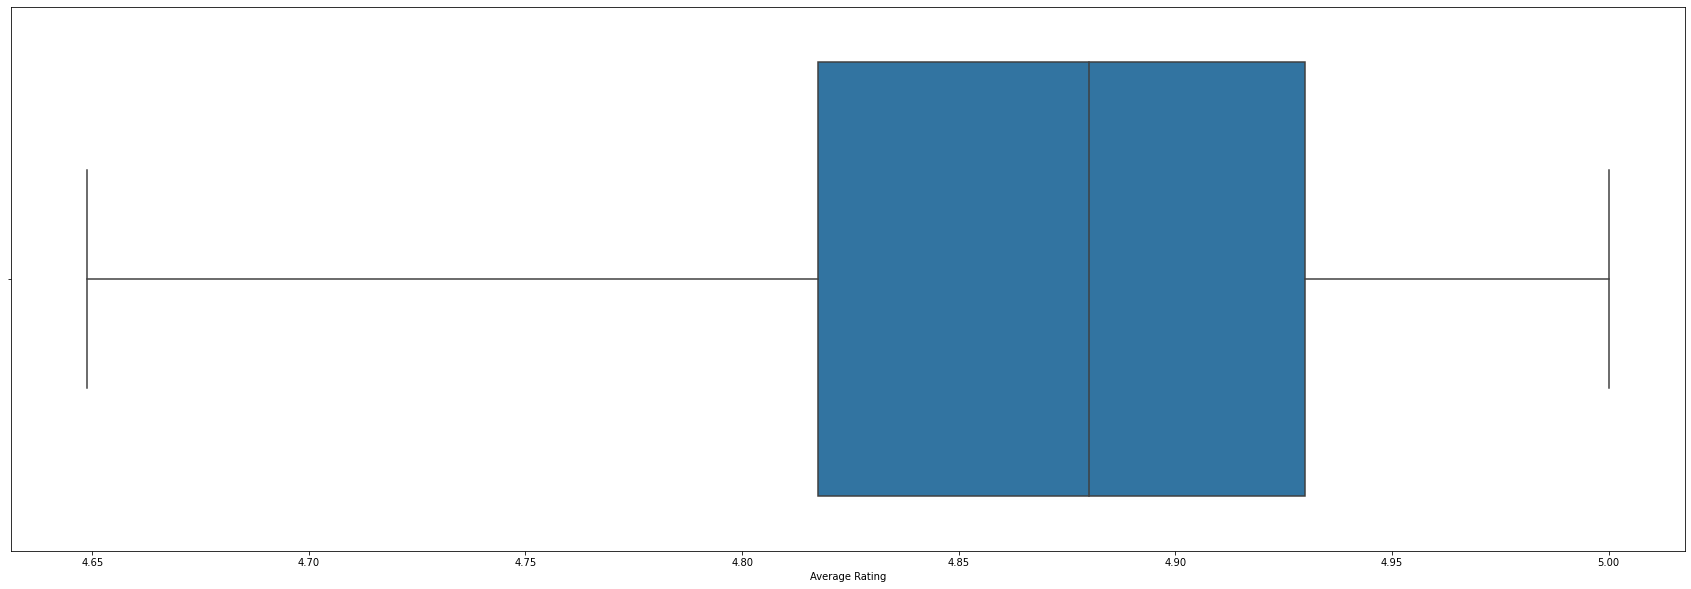

In [ ]:
#average rating after remove outliers
plt.figure(figsize=(30,10))
sns.boxplot(x=rating)

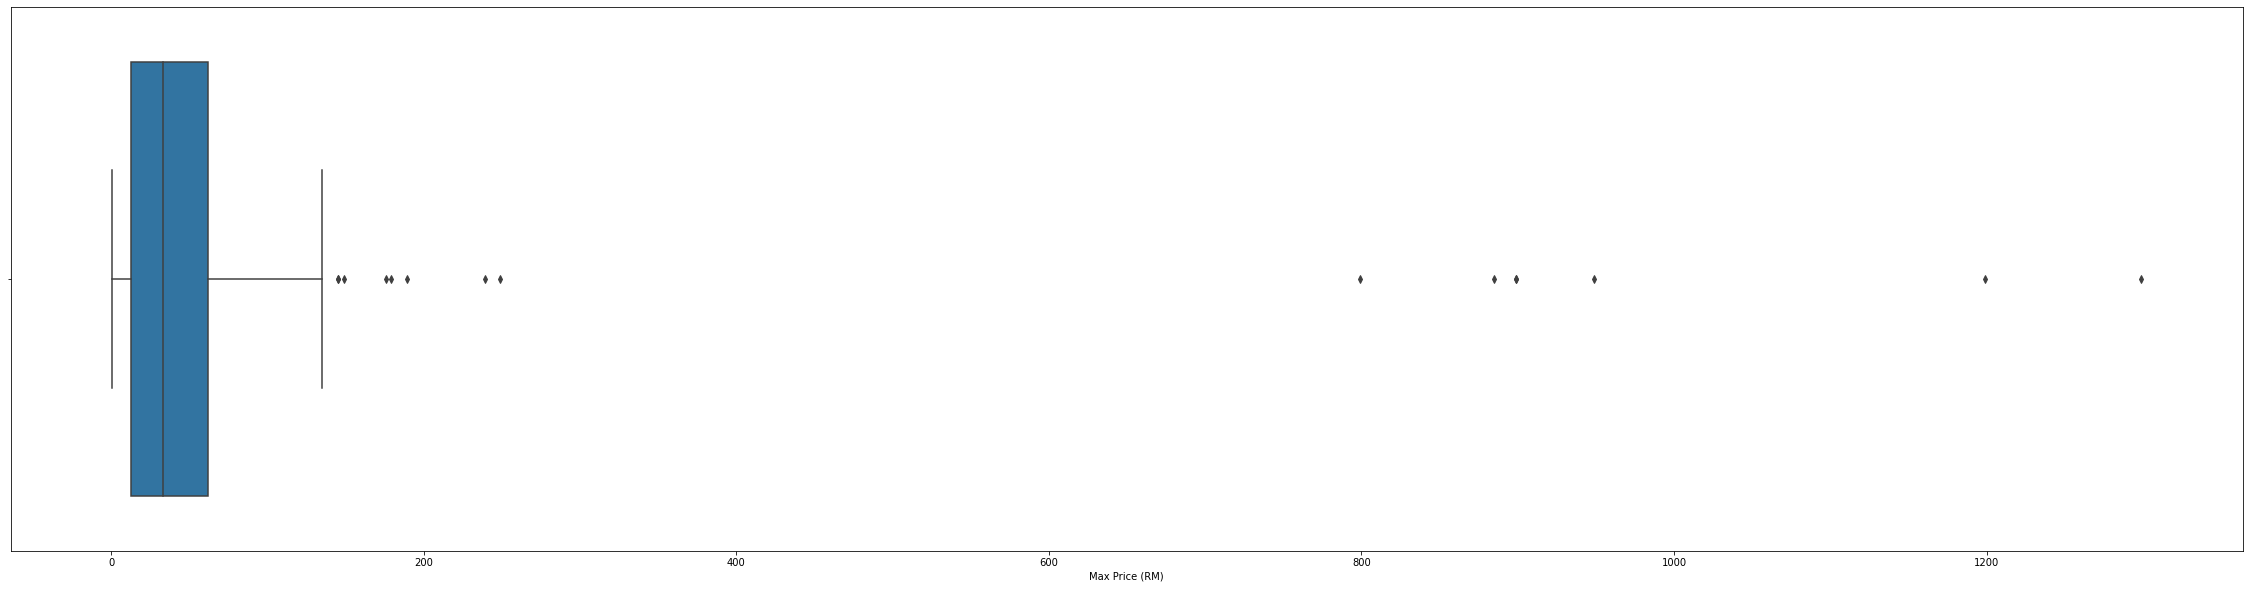

In [ ]:
#data visualization for maximum price before remove outliers
maxprice = data_df['Max Price (RM)']

plt.figure(figsize=(40,10))
sns.boxplot(x=maxprice) #boxplot using seaborn

In [ ]:
lower_bound, upper_bound = find_boundaries(data_df,'Max Price (RM)')
print('lower boundary: ',lower_bound)
print('upper boundary: ', upper_bound)

data_df['Max Price (RM)']=np.where(data_df['Max Price (RM)']>upper_bound, upper_bound,
                          np.where(data_df['Max Price (RM)']<lower_bound, lower_bound, data_df['Max Price (RM)']))

lower boundary:  -62.052499999999995
upper boundary:  136.6275


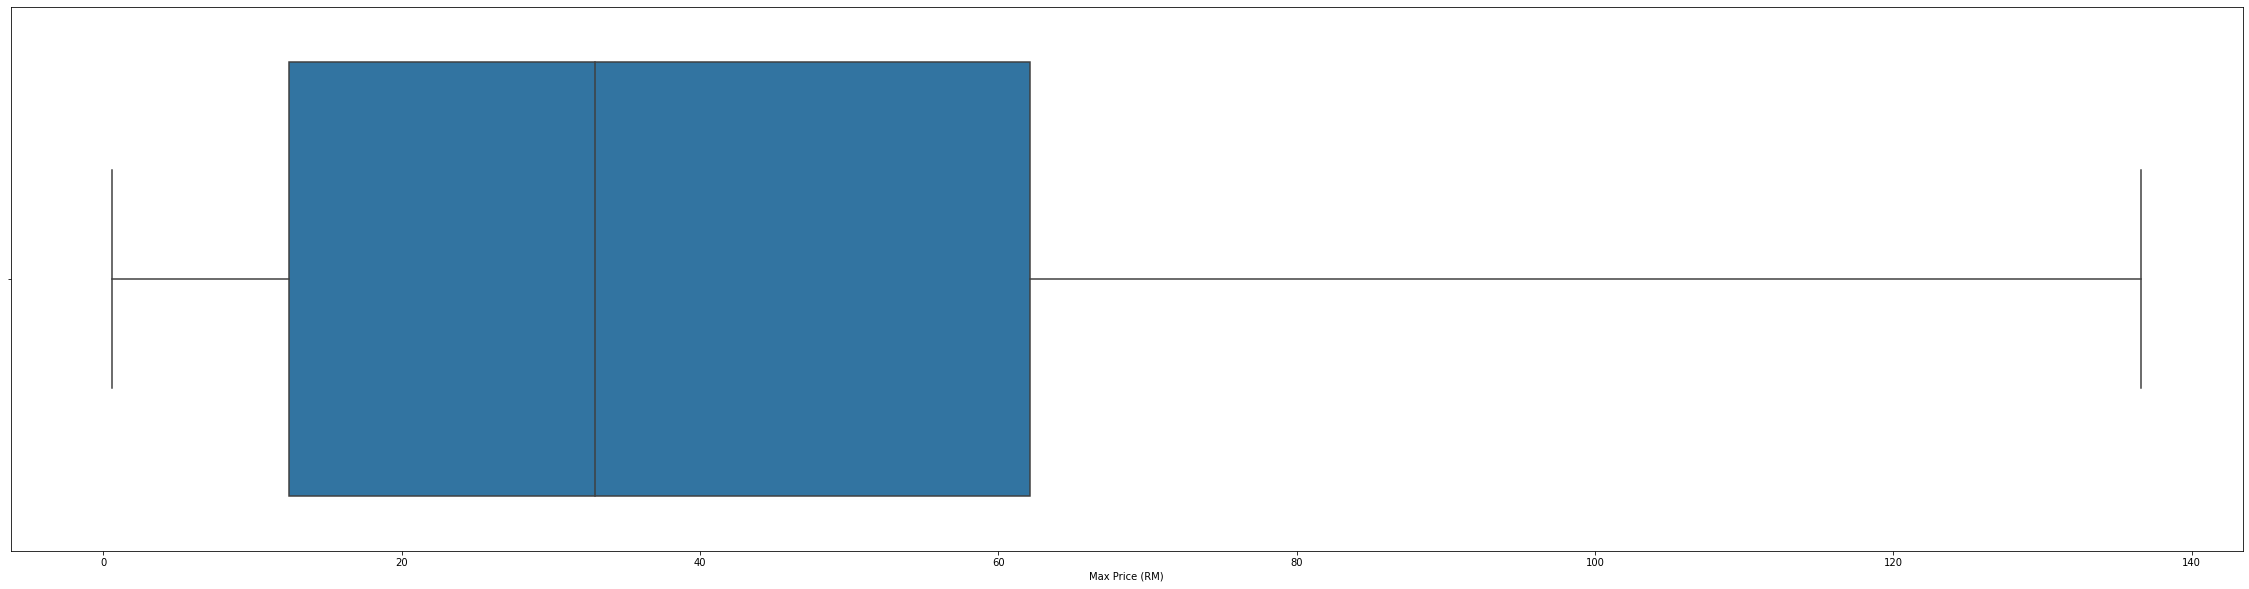

In [ ]:
#max price after remove outliers
plt.figure(figsize=(40,10))
sns.boxplot(x=maxprice)

**Data Visualisation for Minimum Price**

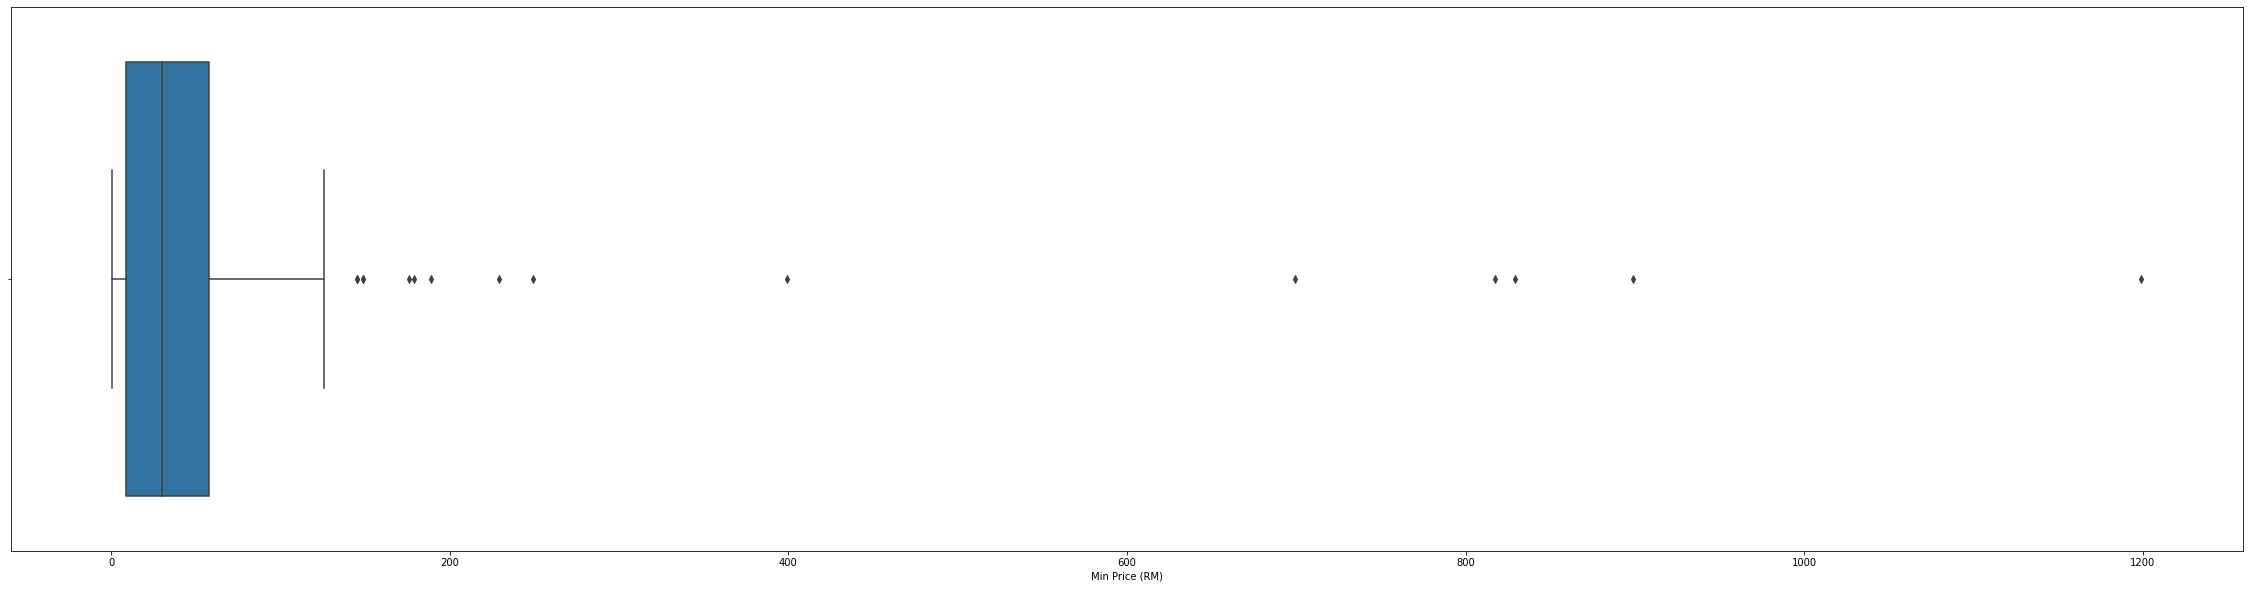

In [ ]:
#data visualization for minimum price before remove outliers
minprice = data_df['Min Price (RM)']

plt.figure(figsize=(40,10))
sns.boxplot(x=minprice) #boxplot using seaborn

In [ ]:
lower_bound, upper_bound = find_boundaries(data_df,'Min Price (RM)')
print('lower boundary: ',lower_bound)
print('upper boundary: ', upper_bound)

data_df['Min Price (RM)']=np.where(data_df['Min Price (RM)']>upper_bound, upper_bound,
                          np.where(data_df['Min Price (RM)']<lower_bound, lower_bound, data_df['Min Price (RM)']))

lower boundary:  -64.05000000000001
upper boundary:  130.75


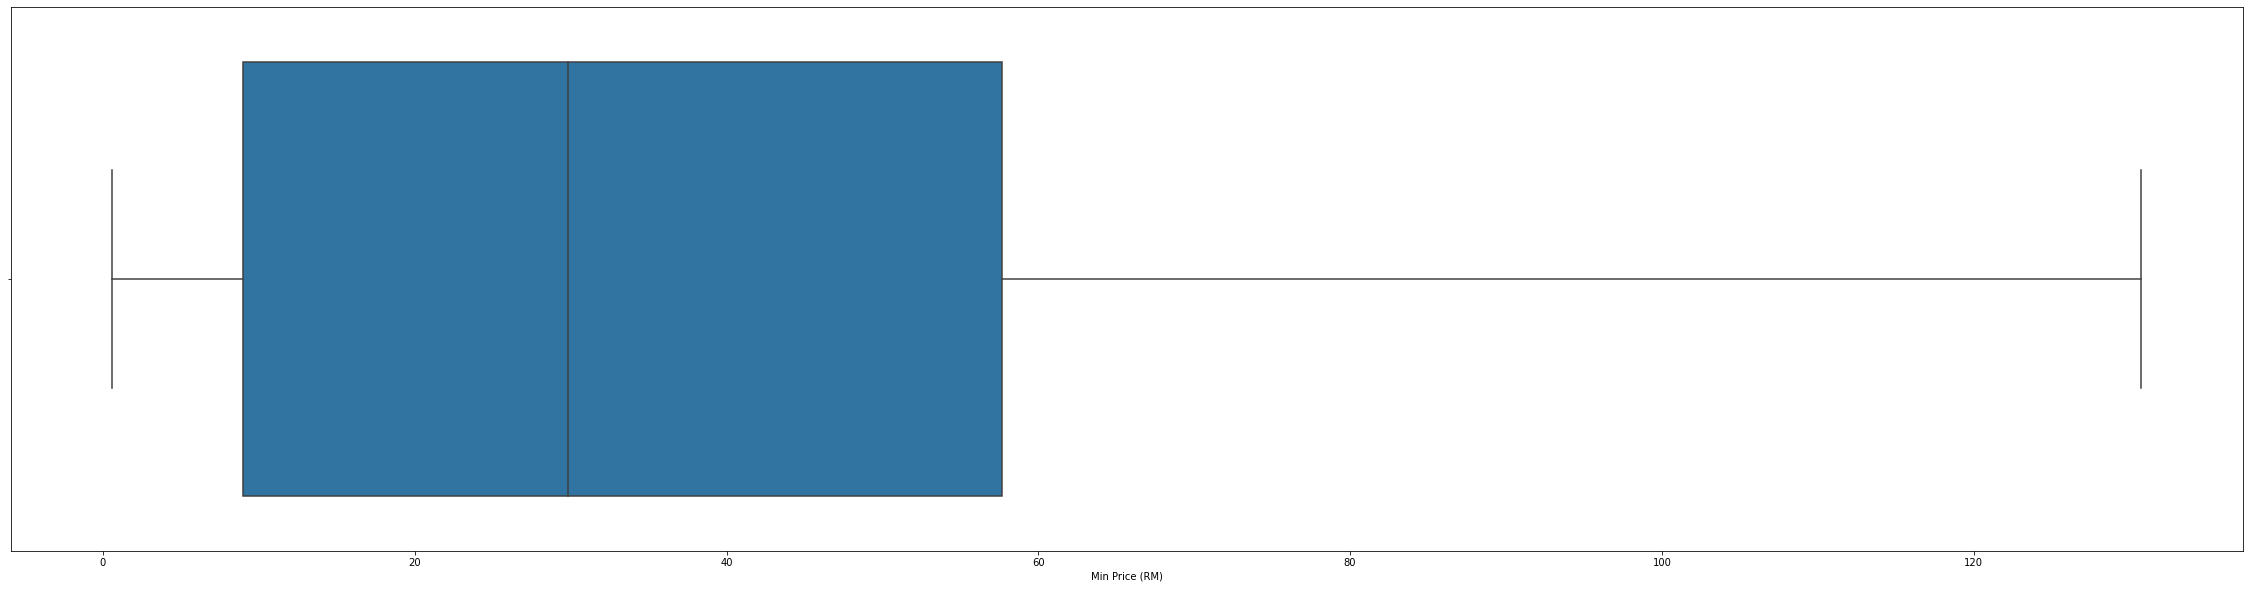

In [ ]:
#min price after remove outliers
plt.figure(figsize=(40,10))
sns.boxplot(x=minprice)

#**Step 3: Load**

In [ ]:
from google.colab import drive
drive.mount('drive')

Mounted at drive


CSV file saved in google drive.

In [ ]:
data_df.to_csv('/content/drive/My Drive/de_scrape_data.csv', encoding='utf-8', index=False)

##**Step 4: Visualization**

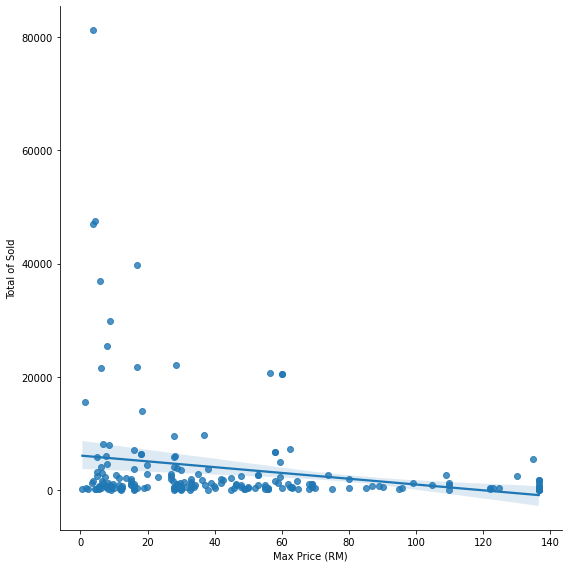

In [ ]:
#max price and total sold
sns.lmplot(x='Max Price (RM)',y='Total of Sold',data=data_df,fit_reg=True, height=8)

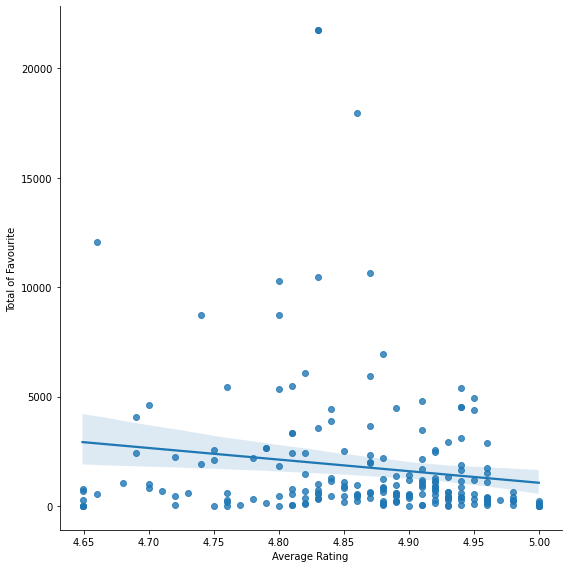

In [ ]:
#average rating and total favourite
sns.lmplot(x='Average Rating',y='Total of Favourite',data=data_df,fit_reg=True, height=8)

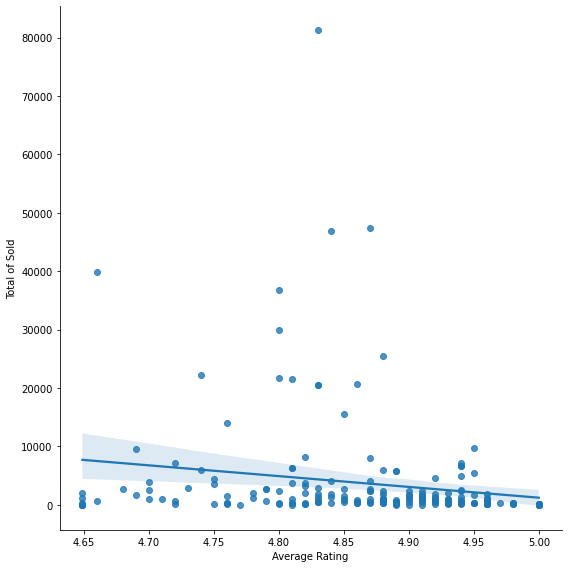

In [ ]:
#average rating and total sold
sns.lmplot(x='Average Rating',y='Total of Sold',data=data_df,fit_reg=True, height=8)

In [ ]:
import plotly.express as px
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.figure_factory as ff
import chart_studio.plotly as py
import chart_studio.tools as tls

In [ ]:
df = pd.read_csv('/content/de_scrape_data.csv')
df.head()

,Product Name,Total of Sold,Total of Favourite,Brand,Min Price (RM),Max Price (RM),Average Rating,Shipping Fee,Shop Location,Discount (%)
0,year warranty casio gshock king of bb dark gxb...,13996,5441,no brand,4.90,18.30,4.76,False,Selangor,91
1,sanda waterproof men fashion watch luxury casu...,54,55,no brand,29.90,29.90,4.81,False,Mainland China,75
2,ready stockgrimo snova watch women magnet watc...,25488,6927,no brand,7.90,7.90,4.88,True,Selangor,84
3,ready stock fsmart watch full touch screen hea...,20537,21744,oem,29.90,59.99,4.83,False,Selangor,60
4,ready stock korean version of women retro watc...,2357,2014,no brand,5.17,7.47,4.87,False,Mainland China,78


In [ ]:
fig_scatter = px.scatter(df, x='Min Price (RM)', y='Total of Sold', color='Brand', template='ggplot2', hover_name=df['Product Name'], opacity=0.6, title='Total number of watches sold to the Minimum price of Watches')
fig_scatter.show()

In [ ]:
fig_scatter = px.scatter(df, x='Average Rating', y='Total of Sold', color='Brand', template='ggplot2', hover_name=df['Total of Favourite'], opacity=0.6, title='Total number of watches sold to the Average Ratings of Watches')
fig_scatter.show()

In [ ]:
fig_bar = px.histogram(df, x='Shop Location', y='Total of Sold', color='Shipping Fee', template='ggplot2', opacity=0.6)
fig_bar.show()

In [ ]:
fig_scatter = px.scatter(df, x='Discount (%)', y='Total of Sold', color='Shop Location', template='ggplot2', hover_name=df['Min Price (RM)'], title='Total Number of Watches Sold to the Discount Offered')
fig_scatter.show()